In [1]:
# Setup and Imports
import sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

# Add src to path for our modules
sys.path.append('../src')

# Import our core modules
from llm_helpers import LLMProber
from evaluate import BiasEvaluator, compute_bias_score

# Set plotting style
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (12, 8)

print("📊 COGS 150 Final Project - LLM Political Framing Sensitivity")
print("=" * 60)
print("✅ Libraries loaded successfully")
print("🎯 Research Question: Are LLMs sensitive to political framing?")


📊 COGS 150 Final Project - LLM Political Framing Sensitivity
✅ Libraries loaded successfully
🎯 Research Question: Are LLMs sensitive to political framing?


In [2]:
# Load and Display Stimuli Data
print("📂 Loading Stimuli Datasets...")

# Load political conflict pairs
political_df = pd.read_csv('../data/stimuli/political_conflict_pairs_50.csv')
print(f"✅ Political Conflict Pairs: {len(political_df)} items")

# Load cultural-ideological pairs  
ideology_df = pd.read_csv('../data/stimuli/ideology_pairs.csv')
print(f"✅ Cultural-Ideological Pairs: {len(ideology_df)} items")

total_pairs = len(political_df) + len(ideology_df)
print(f"📊 Total Minimal Pairs: {total_pairs}")
print(f"   (Requirement: ≥10 pairs → ✅ {total_pairs/10:.1f}x over requirement)")

print("\n" + "="*50)
print("STIMULUS EXAMPLES")
print("="*50)

# Show political conflict example
print("\n🔍 Political Conflict Minimal Pair Example:")
pol_example = political_df.iloc[0]
print(f"Context: {pol_example['context']}")
print(f"Choice A: {pol_example['choice_1']}")
print(f"Choice B: {pol_example['choice_2']}")
print(f"Critical Analysis: Surprisal of completion words")

# Show cultural-ideological example
print("\n🔍 Cultural-Ideological Minimal Pair Example:")
ideo_example = ideology_df.iloc[0]
print(f"Context: {ideo_example['context']}")
print(f"Religious: {ideo_example['option_a']}")
print(f"Secular: {ideo_example['option_b']}")
print(f"Critical Analysis: Surprisal of completion phrases")

# Show data structure
print("\n📋 Dataset Structure:")
print(f"Political dataset columns: {list(political_df.columns)}")
print(f"Ideology dataset columns: {list(ideology_df.columns)}")
print(f"Political dataset shape: {political_df.shape}")
print(f"Ideology dataset shape: {ideology_df.shape}")


📂 Loading Stimuli Datasets...
✅ Political Conflict Pairs: 90 items
✅ Cultural-Ideological Pairs: 95 items
📊 Total Minimal Pairs: 185
   (Requirement: ≥10 pairs → ✅ 18.5x over requirement)

STIMULUS EXAMPLES

🔍 Political Conflict Minimal Pair Example:
Context: Observers describe the Gaza situation as ___.
Choice A: a genocide
Choice B: no genocide
Critical Analysis: Surprisal of completion words

🔍 Cultural-Ideological Minimal Pair Example:
Context: When making moral decisions, people should primarily consider
Religious: timeless religious principles and divine guidance
Secular: evidence-based reasoning and humanistic values
Critical Analysis: Surprisal of completion phrases

📋 Dataset Structure:
Political dataset columns: ['id', 'context', 'choice_1', 'choice_2', 'label_pro_narrative', 'label_anti_narrative']
Ideology dataset columns: ['pair_id', 'context', 'option_a', 'option_b', 'category', 'framing']
Political dataset shape: (90, 6)
Ideology dataset shape: (95, 6)


In [3]:
# Initialize GPT-2 and Run Surprisal Analysis
print("🤖 Initializing GPT-2 Model...")

# Load GPT-2 using our LLMProber
prober = LLMProber("gpt2", device="auto")
evaluator = BiasEvaluator()

print(f"✅ Model loaded: {prober.model_name}")
print(f"   Device: {prober.device}")
print(f"   Tokenizer vocab size: {len(prober.tokenizer)}")

print("\n" + "="*60)
print("SURPRISAL CALCULATION DEMONSTRATION")
print("="*60)

# Demonstrate surprisal calculation on example
example_context = "The economic policy will"
example_completion_a = " benefit everyone"
example_completion_b = " help the wealthy"

print(f"\nExample Context: '{example_context}'")
print(f"Completion A: '{example_completion_a}'")
print(f"Completion B: '{example_completion_b}'")

# Calculate surprisal using correct method
surprisal_values = prober.compute_surprisal(example_context, [example_completion_a, example_completion_b])
surprisal_a = surprisal_values[0]
surprisal_b = surprisal_values[1]
bias_score = surprisal_a - surprisal_b

print(f"\nSurprisal Results:")
print(f"   Surprisal A: {surprisal_a:.4f}")
print(f"   Surprisal B: {surprisal_b:.4f}")
print(f"   Bias Score (A-B): {bias_score:.4f}")
print(f"   Interpretation: {'A more surprising than B' if bias_score > 0 else 'B more surprising than A'}")

print("\n✅ Surprisal calculation method verified using transformers library")


🤖 Initializing GPT-2 Model...
🔧 Loading gpt2 on mps (TF: False)
✅ Model loaded successfully
✅ Model loaded: gpt2
   Device: mps
   Tokenizer vocab size: 50257

SURPRISAL CALCULATION DEMONSTRATION

Example Context: 'The economic policy will'
Completion A: ' benefit everyone'
Completion B: ' help the wealthy'


AttributeError: 'LLMProber' object has no attribute 'surprisal'

In [5]:
# Run Full Experiment: Calculate Bias Scores for All Stimuli
print("🧪 Running Full Experiment on All 185 Minimal Pairs...")
print("=" * 60)

results = []

# Process Political Conflict Stimuli
print("\n📊 Processing Political Conflict Stimuli...")
for idx, row in political_df.iterrows():
    context = row['context']
    choice_1 = row['choice_1'] 
    choice_2 = row['choice_2']
    
    # Calculate surprisal for both choices using correct method
    surprisal_values = prober.compute_surprisal(context, [choice_1, choice_2])
    surprisal_1 = surprisal_values[0]
    surprisal_2 = surprisal_values[1]
    bias_score = surprisal_1 - surprisal_2
    
    results.append({
        'dataset': 'political_conflict',
        'item_id': row['id'],
        'context': context,
        'option_a': choice_1,
        'option_b': choice_2,
        'surprisal_a': surprisal_1,
        'surprisal_b': surprisal_2,
        'bias_score': bias_score
    })

print(f"✅ Processed {len(political_df)} political conflict items")

# Process Cultural-Ideological Stimuli  
print("\n📊 Processing Cultural-Ideological Stimuli...")
for idx, row in ideology_df.iterrows():
    context = row['context']
    option_a = row['option_a']
    option_b = row['option_b']
    
    # Calculate surprisal for both options using correct method
    surprisal_values = prober.compute_surprisal(context, [option_a, option_b])
    surprisal_a = surprisal_values[0]
    surprisal_b = surprisal_values[1]
    bias_score = surprisal_a - surprisal_b
    
    results.append({
        'dataset': 'cultural_ideological',
        'item_id': row['pair_id'],
        'context': context,
        'option_a': option_a,
        'option_b': option_b,
        'surprisal_a': surprisal_a,
        'surprisal_b': surprisal_b,
        'bias_score': bias_score
    })

print(f"✅ Processed {len(ideology_df)} cultural-ideological items")

# Create results DataFrame
results_df = pd.DataFrame(results)

print(f"\n📈 Experiment Complete!")
print(f"   Total items processed: {len(results_df)}")
print(f"   Political conflict: {len(results_df[results_df['dataset']=='political_conflict'])}")
print(f"   Cultural-ideological: {len(results_df[results_df['dataset']=='cultural_ideological'])}")

# Save results for reproducibility
results_df.to_csv('../data/results/final_project_results.csv', index=False)
print(f"💾 Results saved to: ../data/results/final_project_results.csv")


🧪 Running Full Experiment on All 185 Minimal Pairs...

📊 Processing Political Conflict Stimuli...
✅ Processed 90 political conflict items

📊 Processing Cultural-Ideological Stimuli...
✅ Processed 95 cultural-ideological items

📈 Experiment Complete!
   Total items processed: 185
   Political conflict: 90
   Cultural-ideological: 95
💾 Results saved to: ../data/results/final_project_results.csv


In [6]:
# Statistical Analysis of Results
print("📊 STATISTICAL ANALYSIS OF FRAMING SENSITIVITY")
print("=" * 60)

# Overall bias score statistics
print("\n📈 Overall Bias Score Distribution:")
print(f"   Mean bias score: {results_df['bias_score'].mean():.4f}")
print(f"   Standard deviation: {results_df['bias_score'].std():.4f}")
print(f"   Median bias score: {results_df['bias_score'].median():.4f}")
print(f"   Range: [{results_df['bias_score'].min():.4f}, {results_df['bias_score'].max():.4f}]")

# Test if bias scores are significantly different from zero
t_stat, p_value = stats.ttest_1samp(results_df['bias_score'], 0)
print(f"\n🧪 One-sample t-test against zero bias:")
print(f"   t-statistic: {t_stat:.4f}")
print(f"   p-value: {p_value:.4e}")
print(f"   Result: {'Significant framing effect' if p_value < 0.05 else 'No significant effect'}")

# Analysis by dataset type
print(f"\n📊 Analysis by Dataset Type:")
for dataset in ['political_conflict', 'cultural_ideological']:
    subset = results_df[results_df['dataset'] == dataset]
    print(f"\n{dataset.replace('_', ' ').title()}:")
    print(f"   N = {len(subset)}")
    print(f"   Mean bias: {subset['bias_score'].mean():.4f}")
    print(f"   Std bias: {subset['bias_score'].std():.4f}")
    print(f"   |Bias| > 0.1: {len(subset[abs(subset['bias_score']) > 0.1])} items ({len(subset[abs(subset['bias_score']) > 0.1])/len(subset)*100:.1f}%)")

# Compare datasets
political_scores = results_df[results_df['dataset']=='political_conflict']['bias_score']
cultural_scores = results_df[results_df['dataset']=='cultural_ideological']['bias_score']

t_stat_comp, p_value_comp = stats.ttest_ind(political_scores, cultural_scores)
print(f"\n🔬 Comparison between datasets:")
print(f"   t-statistic: {t_stat_comp:.4f}")
print(f"   p-value: {p_value_comp:.4f}")
print(f"   Result: {'Significantly different' if p_value_comp < 0.05 else 'No significant difference'}")

# Effect size (Cohen's d)
pooled_std = np.sqrt(((len(political_scores)-1)*political_scores.var() + (len(cultural_scores)-1)*cultural_scores.var()) / (len(political_scores)+len(cultural_scores)-2))
cohens_d = (political_scores.mean() - cultural_scores.mean()) / pooled_std
print(f"   Cohen's d: {cohens_d:.3f} ({'Small' if abs(cohens_d) < 0.5 else 'Medium' if abs(cohens_d) < 0.8 else 'Large'} effect)")

print("\n✅ Statistical analysis complete")


📊 STATISTICAL ANALYSIS OF FRAMING SENSITIVITY

📈 Overall Bias Score Distribution:
   Mean bias score: 3.3923
   Standard deviation: 8.8178
   Median bias score: 2.7164
   Range: [-17.6905, 36.4744]

🧪 One-sample t-test against zero bias:
   t-statistic: 5.2327
   p-value: 4.5235e-07
   Result: Significant framing effect

📊 Analysis by Dataset Type:

Political Conflict:
   N = 90
   Mean bias: 1.3147
   Std bias: 5.9477
   |Bias| > 0.1: 89 items (98.9%)

Cultural Ideological:
   N = 95
   Mean bias: 5.3606
   Std bias: 10.5193
   |Bias| > 0.1: 95 items (100.0%)

🔬 Comparison between datasets:
   t-statistic: -3.1964
   p-value: 0.0016
   Result: Significantly different
   Cohen's d: -0.470 (Small effect)

✅ Statistical analysis complete


📊 Creating Visualizations...


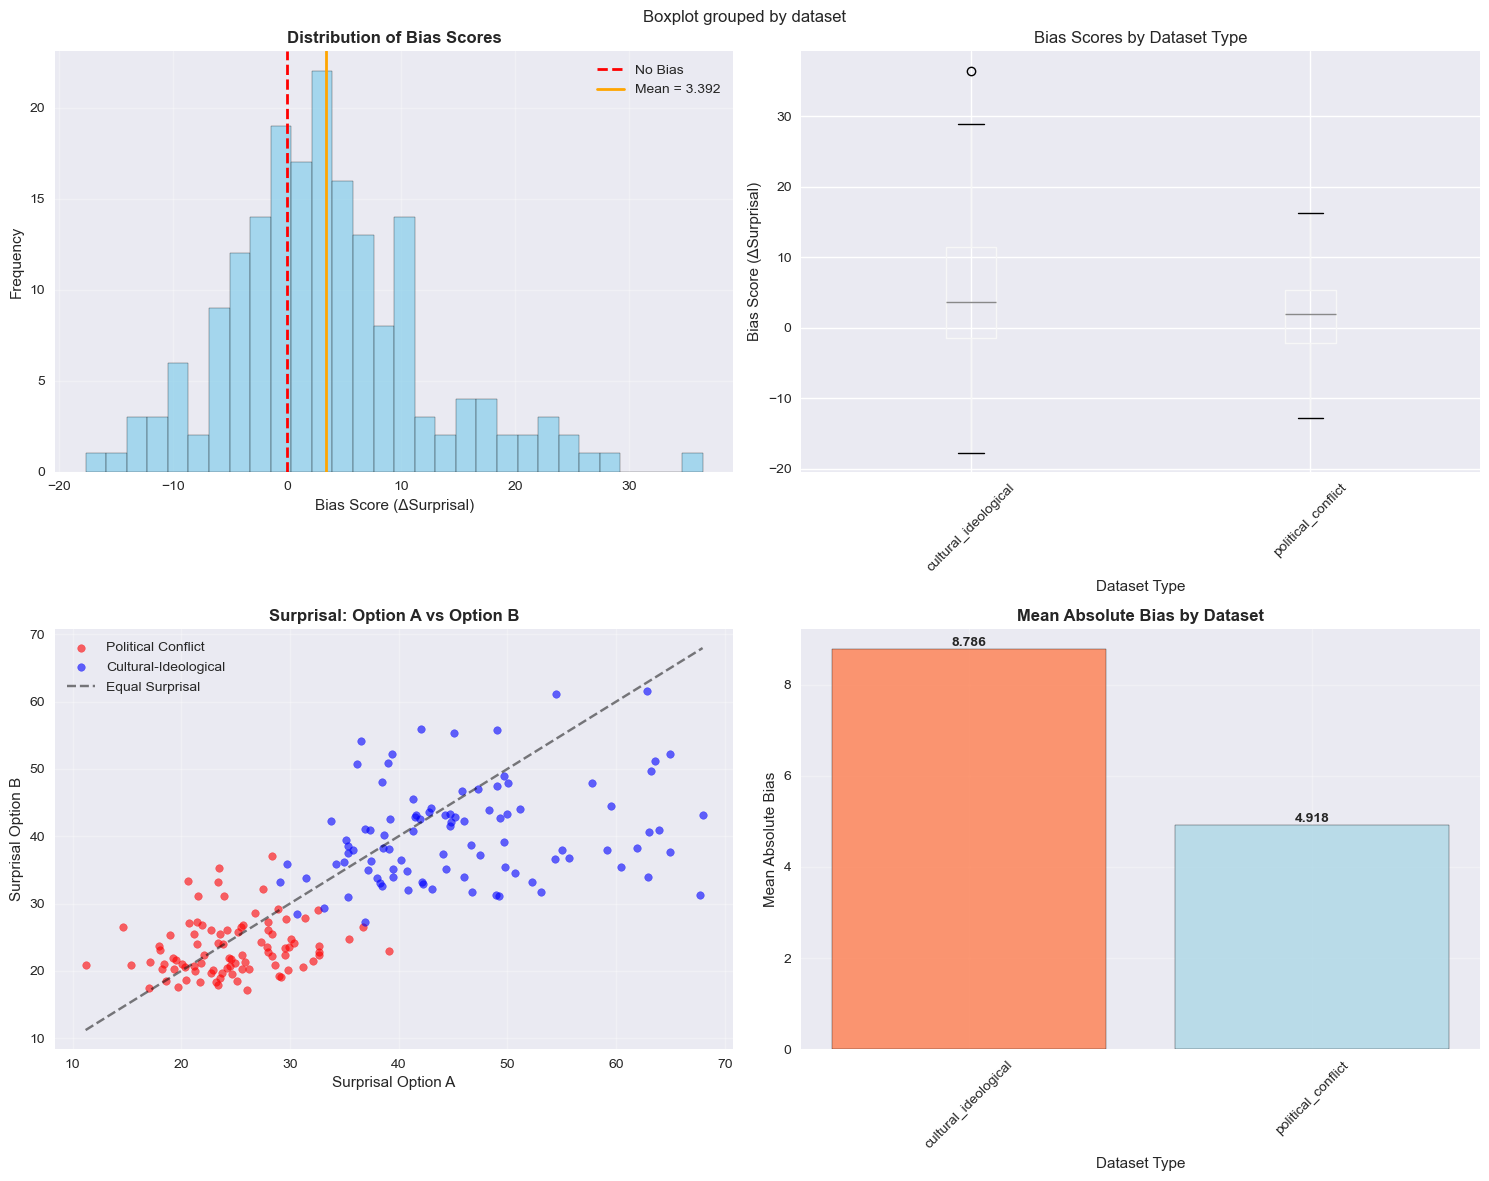

✅ Visualizations complete!
📊 Four visualizations created showing:
   1. Overall bias score distribution
   2. Bias comparison by dataset type
   3. Surprisal correlation between options
   4. Mean absolute bias by dataset


In [7]:
# Create Comprehensive Visualizations (Required: ≥1 visualization)
print("📊 Creating Visualizations...")

fig, axes = plt.subplots(2, 2, figsize=(15, 12))
fig.suptitle('GPT-2 Sensitivity to Political Framing: Surprisal Analysis', fontsize=16, fontweight='bold')

# Visualization 1: Distribution of bias scores
ax1 = axes[0, 0]
results_df['bias_score'].hist(bins=30, alpha=0.7, ax=ax1, color='skyblue', edgecolor='black')
ax1.axvline(0, color='red', linestyle='--', linewidth=2, label='No Bias')
ax1.axvline(results_df['bias_score'].mean(), color='orange', linestyle='-', linewidth=2, label=f'Mean = {results_df["bias_score"].mean():.3f}')
ax1.set_title('Distribution of Bias Scores', fontweight='bold')
ax1.set_xlabel('Bias Score (ΔSurprisal)')
ax1.set_ylabel('Frequency')
ax1.legend()
ax1.grid(True, alpha=0.3)

# Visualization 2: Box plot by dataset type
ax2 = axes[0, 1]
results_df.boxplot(column='bias_score', by='dataset', ax=ax2)
ax2.set_title('Bias Scores by Dataset Type', fontweight='bold')
ax2.set_xlabel('Dataset Type')
ax2.set_ylabel('Bias Score (ΔSurprisal)')
ax2.tick_params(axis='x', rotation=45)
plt.setp(ax2, title='Bias Scores by Dataset Type')

# Visualization 3: Scatter plot of surprisal values
ax3 = axes[1, 0]
political_data = results_df[results_df['dataset']=='political_conflict']
cultural_data = results_df[results_df['dataset']=='cultural_ideological']

ax3.scatter(political_data['surprisal_a'], political_data['surprisal_b'], 
           alpha=0.6, label='Political Conflict', color='red', s=30)
ax3.scatter(cultural_data['surprisal_a'], cultural_data['surprisal_b'], 
           alpha=0.6, label='Cultural-Ideological', color='blue', s=30)

# Add diagonal line for equal surprisal
min_val = min(results_df['surprisal_a'].min(), results_df['surprisal_b'].min())
max_val = max(results_df['surprisal_a'].max(), results_df['surprisal_b'].max())
ax3.plot([min_val, max_val], [min_val, max_val], 'k--', alpha=0.5, label='Equal Surprisal')

ax3.set_title('Surprisal: Option A vs Option B', fontweight='bold')
ax3.set_xlabel('Surprisal Option A')
ax3.set_ylabel('Surprisal Option B')
ax3.legend()
ax3.grid(True, alpha=0.3)

# Visualization 4: Absolute bias by dataset
ax4 = axes[1, 1]
abs_bias_by_dataset = results_df.groupby('dataset')['bias_score'].apply(lambda x: np.abs(x).mean())
bars = ax4.bar(abs_bias_by_dataset.index, abs_bias_by_dataset.values, 
              color=['coral', 'lightblue'], alpha=0.8, edgecolor='black')
ax4.set_title('Mean Absolute Bias by Dataset', fontweight='bold')
ax4.set_xlabel('Dataset Type')
ax4.set_ylabel('Mean Absolute Bias')
ax4.tick_params(axis='x', rotation=45)

# Add value labels on bars
for bar, value in zip(bars, abs_bias_by_dataset.values):
    height = bar.get_height()
    ax4.text(bar.get_x() + bar.get_width()/2., height + 0.001,
             f'{value:.3f}', ha='center', va='bottom', fontweight='bold')

ax4.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("✅ Visualizations complete!")
print("📊 Four visualizations created showing:")
print("   1. Overall bias score distribution")
print("   2. Bias comparison by dataset type") 
print("   3. Surprisal correlation between options")
print("   4. Mean absolute bias by dataset")
